In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

dataset = pd.read_excel('Version 1.xlsx')
columns = [n.title() for n in dataset.columns.str.split(',')[0]]
dataset = dataset.iloc[:,0].str.split(',', expand = True)
dataset.columns = columns
dataset.head()

,Date,Meantemp,Humidity,Wind_Speed,Meanpressure
0,2013-01-01,10.0,84.5,0.0,1015.6666666666666
1,2013-01-02,7.4,92.0,2.98,1017.8
2,2013-01-03,7.166666666666667,87.0,4.633333333333334,1018.6666666666666
3,2013-01-04,8.666666666666666,71.33333333333333,1.2333333333333334,1017.1666666666666
4,2013-01-05,6.0,86.83333333333333,3.6999999999999997,1016.5


## Sorting by date

In [2]:
dataset.sort_values('Date')

,Date,Meantemp,Humidity,Wind_Speed,Meanpressure
0,2013-01-01,10.0,84.5,0.0,1015.6666666666666
1,2013-01-02,7.4,92.0,2.98,1017.8
2,2013-01-03,7.166666666666667,87.0,4.633333333333334,1018.6666666666666
3,2013-01-04,8.666666666666666,71.33333333333333,1.2333333333333334,1017.1666666666666
4,2013-01-05,6.0,86.83333333333333,3.6999999999999997,1016.5
...,...,...,...,...,...
1467,2016-12-28,17.217391304347824,68.04347826086956,3.547826086956522,1015.5652173913044
1468,2016-12-29,15.238095238095237,87.85714285714286,6.0,1016.9047619047619
1469,2016-12-30,14.095238095238095,89.66666666666667,6.266666666666667,1017.9047619047619
1470,2016-12-31,15.052631578947368,87.0,7.325,1016.1


## Dataset information

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1472 non-null   object
 1   Meantemp      1472 non-null   object
 2   Humidity      1470 non-null   object
 3   Wind_Speed    1470 non-null   object
 4   Meanpressure  1470 non-null   object
dtypes: object(5)
memory usage: 57.6+ KB


In [4]:
dataset.describe()

,Date,Meantemp,Humidity,Wind_Speed,Meanpressure
count,1472,1472,1470,1470,1470
unique,1462,621,897,772,626
top,2013-01-24,31.0,65.5,0.0,1016.0
freq,2,18,9,26,13


## Transforming the data

In [5]:
dataset = dataset.assign(Date = pd.to_datetime(dataset.Date),
                        Meantemp = pd.to_numeric(dataset.Meantemp),
                        Humidity = pd.to_numeric(dataset.Humidity),
                        Wind_Speed = pd.to_numeric(dataset.Wind_Speed, errors='coerce'),
                        Meanpressure = pd.to_numeric(dataset.Meanpressure))

dataset.dtypes

Date            datetime64[ns]
Meantemp               float64
Humidity               float64
Wind_Speed             float64
Meanpressure           float64
dtype: object

## Search and delete null values

In [6]:
dataset.isnull().sum()

Date            0
Meantemp        3
Humidity        2
Wind_Speed      5
Meanpressure    2
dtype: int64

In [7]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

Date            0
Meantemp        0
Humidity        0
Wind_Speed      0
Meanpressure    0
dtype: int64

## Search for outliers

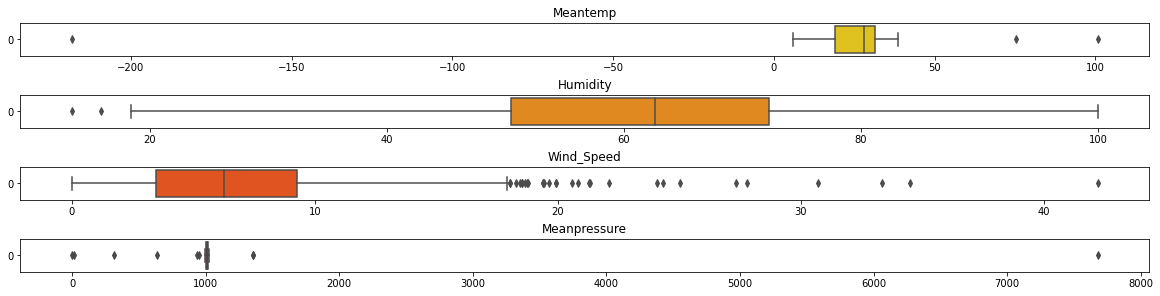

In [8]:
cols = dataset.columns[1:]
fig, ax = plt.subplots(nrows = len(cols), ncols = 1, figsize = (16, 4), constrained_layout = True)
colors = ["gold", "darkorange", "orangered", "crimson"]
for i in range(len(cols)):
    sns.boxplot(data = dataset[cols[i]], color=colors[i], ax = ax[i], orient = "h").set_title(cols[i])

## Deleting oultiers

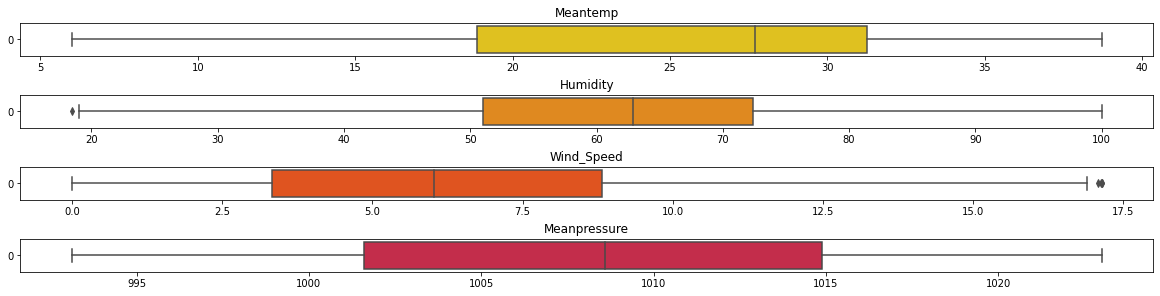

In [9]:
def get_ranges(x):
    sorted(x)
    Q1, Q3 = np.percentile(x, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (IQR * 1.5)
    upper_range = Q3 + (IQR * 1.5)
    #print(x.min(), lower_range, upper_range, x.max())
    #lower_range = x.min() if lower_range < x.min() else lower_range
    #upper_range = x.max() if upper_range > x.max() else upper_range
    return lower_range, upper_range

def check_for_outliers(column):
    lower, higher = get_ranges(column)
    return column.max() > higher or column.min() < lower

for column_name in cols:
    #print(column_name)
    while check_for_outliers(dataset[column_name]):
        low, high = get_ranges(dataset[column_name])
        dataset = dataset[(dataset[column_name] > low) & (dataset[column_name] < high)]
            
dataset.reset_index(drop = True, inplace = True)
fig, ax = plt.subplots(nrows = len(cols), ncols = 1, figsize = (16, 4), constrained_layout = True)
colors = ["gold", "darkorange", "orangered", "crimson"]
for i in range(len(cols)):
    sns.boxplot(data = dataset[cols[i]], ax = ax[i], color=colors[i], orient = "h").set_title(cols[i])